In [22]:
# !pip3 install tensorflow
# !pip3 install --upgrade tensorflow-hub

In [23]:
import tensorflow as tf
from PIL import Image
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_hub as hub

In [24]:
def load_image(image_path):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_image(image, channels=3)
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = tf.image.resize(image, (700, 600))
    image = image[tf.newaxis, :]
    return image

In [25]:
content_image = load_image("a person sitting on the ground reading a book.jpg")
style_image = load_image("silver baubles on red wall.jpg")

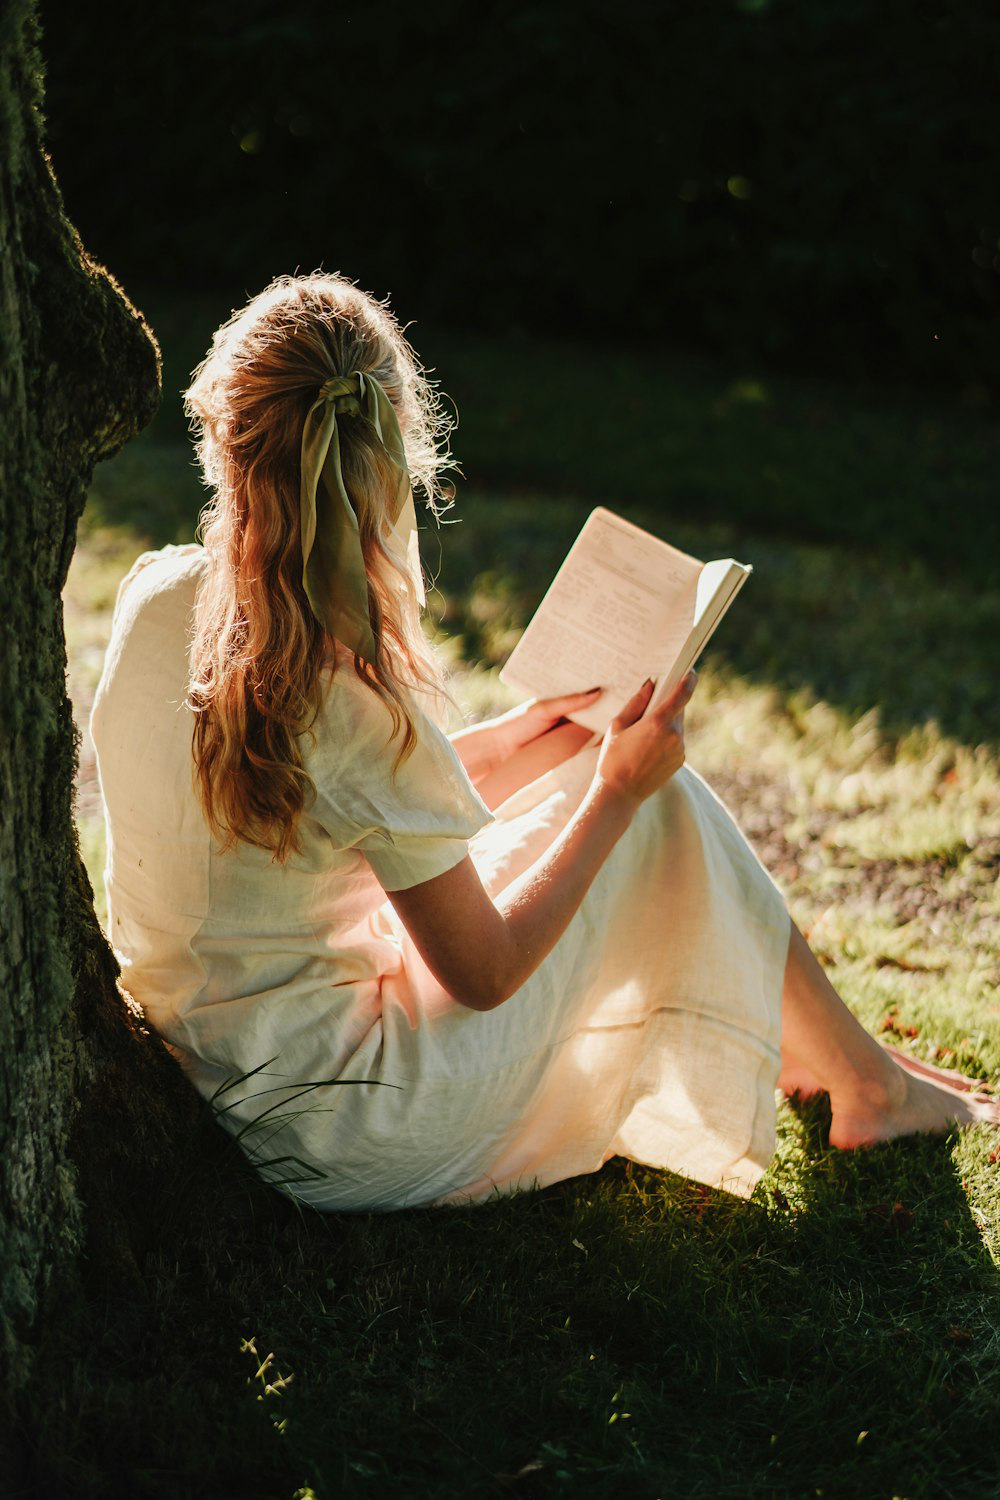

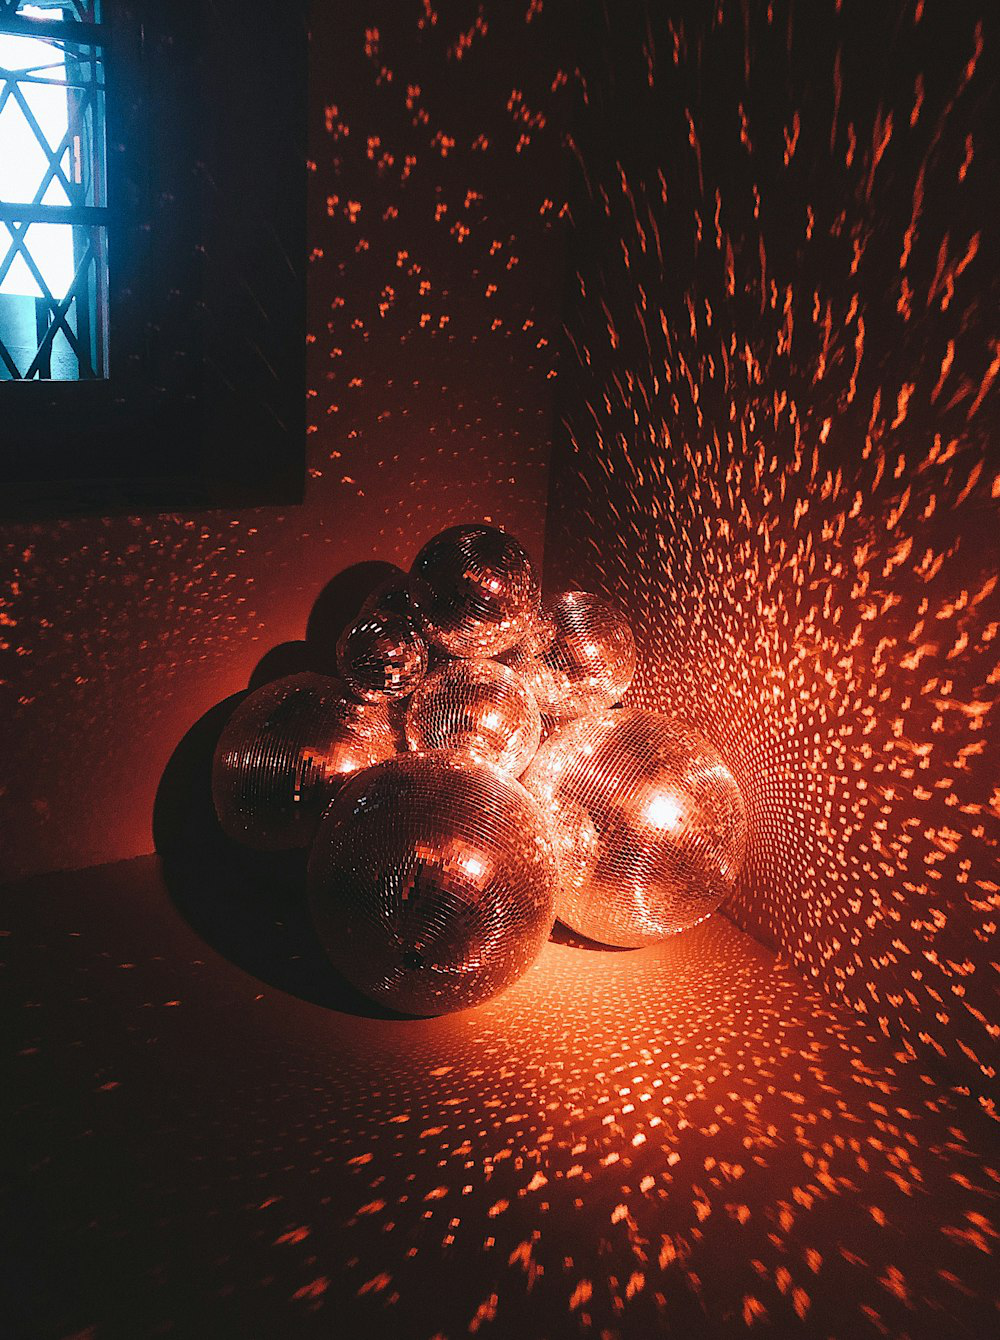

In [26]:
c_img = Image.open("a person sitting on the ground reading a book.jpg")
s_img = Image.open("silver baubles on red wall.jpg")

display(c_img)
display(s_img)

In [27]:
model = hub.load("https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2")


In [28]:
stylized_image = model(tf.constant(content_image), tf.constant(style_image))[0]

In [29]:
def tensor_to_image(image):
    image = image * 255.0
    image = np.array(image, dtype=np.uint8)
    return Image.fromarray(image[0])

In [30]:
final_image = tensor_to_image(stylized_image)
final_image.save("stylized_image 3.jpg")


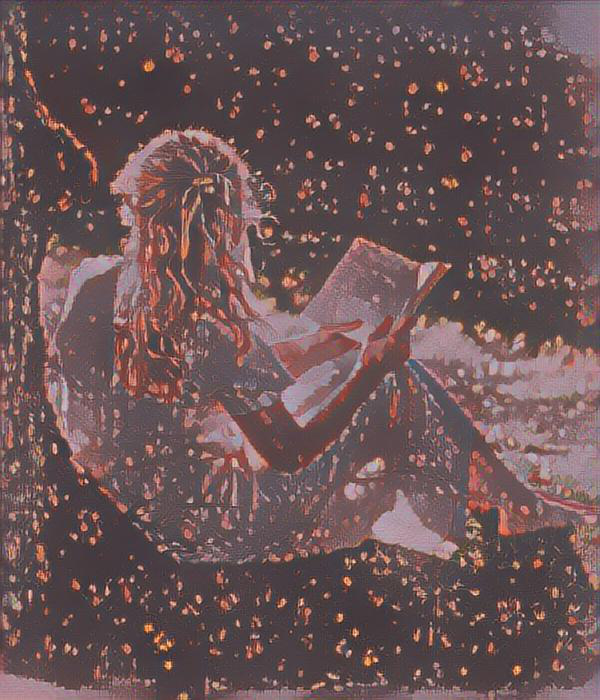

In [31]:
f_img = Image.open("stylized_image 3.jpg")

display(f_img)